# Библиотека Numpy

In [2]:
L = range(10000)
%timeit [i**2 for i in L]

6.99 ms ± 329 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
import numpy as np
L = np.arange(10000)
%timeit L**2

19 µs ± 2.61 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Импорт библиотеки

In [4]:
#Стандартный способ, которого желательно всюду придерживаться
import numpy as np

In [5]:
#Другие возможные варианты
import numpy
from numpy import sort, sqrt, mean
from numpy import *

In [6]:
#Так делать не нужно
from numpy import max
import numpy as some_magic_liblary

### Массив ndarray

Numpy умеет хранить в памяти массивы **однородных** значений (int, float, строки ограниченной длины, указатели на другие объекты).

Объект массив имеет несколько важных параметров:
* shape - размерность массива
* dtype - тип элементов массива
* stride - описание того, как считывать массив 

Пример одномерного массива:

In [7]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Параметры массива:

In [8]:
print(arr.shape)
print(arr.dtype)
print(arr.strides)

(10,)
int32
(4,)


Пример двумерного массива:

In [9]:
arr_2d = np.arange(10, dtype=float).reshape((2,-1))
arr_2d

array([[0., 1., 2., 3., 4.],
       [5., 6., 7., 8., 9.]])

Параметры массива:

In [10]:
print(arr_2d.shape)
print(arr_2d.dtype)
print(arr_2d.strides)

(2, 5)
float64
(40, 8)


### Способы задания массивов

In [11]:
# Create an array of evenly-spaced values
np.arange(10, 25, 5)

array([10, 15, 20])

In [12]:
# Create an array of evenly-spaced values
np.linspace(0, 2, 9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [13]:
# Create an array of ones
np.ones((3, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [14]:
# Create an array of zeros
np.zeros((2, 3, 4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [15]:
# Create an array with random values
np.random.random((2, 2))

array([[0.55448963, 0.76751654],
       [0.72468694, 0.68669967]])

In [16]:
# Create a full array
np.full((2, 2), 7)

array([[7, 7],
       [7, 7]])

In [17]:
# Create a diagonal matrix
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

### Индексация элементов массива

In [18]:
a = np.arange(10)
print(a[0])
print(a[[3, -1]])
print(a[3::2])
print(a[6: -2])
print(a[:-3])

0
[3 9]
[3 5 7 9]
[6 7]
[0 1 2 3 4 5 6]


Индексация многомерных массивов:

In [19]:
a = np.diag(np.arange(3))
print(a[1, 2])
print(a[1:])

0
[[0 1 0]
 [0 0 2]]


Бывает удобно использовать маски:

In [20]:
a = np.arange(10, 20)
mask = a % 3 == 0 
print(mask) 

[False False  True False False  True False False  True False]


Выбор элементов по маске

In [21]:
print(a[mask])

[12 15 18]


Операции над элементами по маске

In [22]:
a[a%3 == 0] = -1
print(a)

[10 11 -1 13 14 -1 16 17 -1 19]


### Арифметические операции выполняются поэлементно

In [23]:
a = np.arange(1, 4)
print(a + 1)
print(2**a)
print(a**2)

[2 3 4]
[2 4 8]
[1 4 9]


### Функции над массивами

In [24]:
a = np.array([1, 2, 3])
print(np.sum(a), np.sin(a), np.mean(a), np.std(a), np.min(a))

6 [0.84147098 0.90929743 0.14112001] 2.0 0.816496580927726 1


Многие функции являются  методами массива:

In [25]:
a.mean() == np.mean(a)

True

Для многомерных массивов можно управлять вдоль какой размерности применять метод:

In [26]:
a=np.arange(24).reshape((6, 4))
print(np.mean(a, axis=1))
a

[ 1.5  5.5  9.5 13.5 17.5 21.5]


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

Сортировка элементов:

In [27]:
a = np.random.randn(5)
print(np.sort(a), np.argsort(a))

[-0.0295259   0.61738741  0.93351624  1.1827201   1.33612289] [4 2 0 3 1]


### Сложение массивов

In [28]:
a = np.floor(10 * np.random.rand(2, 2))
print('Array a\n', a)

b = np.floor(10 * np.random.rand(2, 2))
print('Array b\n', b)

print('\n--Concatenate a and b vertically --\n')
print(np.vstack((a, b))) # сложение по вертикали
print('\n--Concatenate a and b horizontally--\n')
print(np.hstack((a, b))) # сложение по горизонтали

Array a
 [[4. 6.]
 [4. 2.]]
Array b
 [[6. 1.]
 [7. 8.]]

--Concatenate a and b vertically --

[[4. 6.]
 [4. 2.]
 [6. 1.]
 [7. 8.]]

--Concatenate a and b horizontally--

[[4. 6. 6. 1.]
 [4. 2. 7. 8.]]


### Array broadcasting
Схема ниже показывает, как происходит скложение массивов. Если shape у массивов не совпадают, то массив меньшей размерности "естественным образом" дополняется до большей размерности.

![title](http://www.scipy-lectures.org/_images/numpy_broadcasting.png)

In [29]:
x = np.ones((3, 4))
y = np.random.rand(4)

# Add `x` and `y`. Note that `x` and `y` have different shapes.
print(x.shape, y.shape)
print(x + y)

(3, 4) (4,)
[[1.37199273 1.30938553 1.67594503 1.60689469]
 [1.37199273 1.30938553 1.67594503 1.60689469]
 [1.37199273 1.30938553 1.67594503 1.60689469]]


Как прибавить массив ко всем столбцам матрицы?

In [30]:
x = np.ones((3, 4))
y = np.random.rand(3)

print(x + y)

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [ ]:
#Fix me!

### Упражнения
При решении стремитесь использовать минимальное число строк кода

Создайте массив 10х10, заполненный в центре нулями, а по границе единицами.

Создайте массив 8х8, заполненный 0 и 1 в шахматном порядке.

Создайте масив first_column из четырех элементов: 0, 10, 20, 30. Затем создайте двухмерный массив 4x5, в котором первый столбец - массив first_column, а каждый элемент каждой строки, начиная со второго,  больше предыдущего элемента этой же строки на 1.

Создайте случаынй массив 5х5 и нормируйте его так, чтобы среднее по каждой строке было в точности ноль.

Создайте произвольный двумерный массив NxM, N, M > 1. На его основе создайте новый двумерный массив, значения в котором являются средним значением исходного во всевозможных окошках размера 2х2 со сдвигом 1 по вертикали и горизонтали. 

Пример входа:
```
array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]])
```

Ожидание на выходе:
```
array([[ 5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5, 12.5, 13.5],
       [15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5],
       [25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5]])
```

In [ ]:
#Подсказка: numpy.lib.stride_tricks.sliding_window_view

### Read more

[http://scipy-lectures.org/intro/numpy/array_object.html](http://scipy-lectures.org/intro/numpy/array_object.html)

[https://www.datacamp.com/community/tutorials/python-numpy-tutorial](https://www.datacamp.com/community/tutorials/python-numpy-tutorial)

[https://docs.scipy.org/doc/numpy/user/quickstart.html](https://docs.scipy.org/doc/numpy/user/quickstart.html)


### Let's practice: k-means clustering algorithm

<img src="https://miro.medium.com/max/1400/1*TmvsQ4XaOxeb-TmKk1qgOw.png" style="width: 60%;"/>

В каких задачах может помочь кластеризация:
* разделение выборки на группы
* оценка числа групп в выборке
* понижение размерности данных
* поиск аномалий

Описание алгоритма k-means:

<img src="https://www.researchgate.net/publication/325937073/figure/fig1/AS:640499832606720@1529718468476/Pseudocode-of-k-means-algorithm-K-means-algorithm-classifies-objects-in-clusters.png" style="width: 60%;"/>


Какой функционал минимизируетя алгоритом kmeans?

Алгоритом kmeans минимизируется суммарная внутрикластерная дисперсия

$$J(c_1, ..., c_K) = \sum\limits_{i=1}^{K}\sum\limits_{j\in Cluster_i}||d_j - c_i||^2$$


Пример итераций алгоритма k-means:

<img src="https://stanford.edu/~cpiech/cs221/img/kmeansViz.png" style="width: 60%;"/>

Оценка числа кластеров:

<img src="https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/995b8b58-06f1-4884-a2a1-f3648428e947.png" style="width: 60%;"/>

### Датасет MNIST

Одной из задач домашнего задания будет применить алгоритм kmeans для датасета MNSIT рукописных цифр. Для начала загрузим датасет и посмотрим что в нем.

In [1]:
from sklearn.datasets import fetch_openml

#Загрузка может занять около минуты
images, labels = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

```images``` - массив картинок размера 28х28, вытянутых в вектор размера 784. Всего в датасете 70К примеров картинок

In [29]:
images[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

```labels``` - массив, в котором записано, какая цифра нарисована на каждой картинке картинке

In [19]:
labels[:1000].shape

(1000,)

Нарисуем пример одной из картинок:

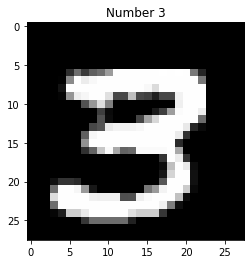

In [6]:
import matplotlib.pyplot as plt

i = 111
plt.imshow(images[i].reshape(28, 28), cmap='Greys_r')
plt.title('Number ' + labels[i])
plt.show()

Можно предположить, что в пространстве размера 784 картинки, отвечающие разным цифрам, лежат в отдельных кластерах. В домашнем задании предстоит выяснить, что по этому поводу думает алгоритм kmeans. 

### Homework

1. Создайте матрицу 5x5 со значениями 1,2,3,4 под главной диагональю. Остальные значения - нули.

2. Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

3. Создайте двумерный массив 6x6, заполненный случайными значениями. Сумму по каждой строке поделите на максимальный элемент из столбца с тем же индексом.

4. На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

5. Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

6. Сколько вы можете предложить способов округлить значения в массиве до ближайшего целого?
 
7. Написать функцию, реализующую алгоритм k-means.

    Входом в функцию является
    * массив NxM, где N - число объектов, M - число признаков объекта
    * k - число кластеров
    * max_iter - максимальное число итераций
    * theshold - критерий остановки (если на очередной итерации метода суммарное квадратичное отклонение изменяется меньше, чем на theshold, итерации прекращаются)
    
   Выход:
   * массив длины  N, содержащий индексы кластеров от 0 до k-1
   * суммарное квадратичное отклонение для полученного разбиения на кластеры
   
   **Фунция должна содержать не более 2 циклов for/while!**
   **Стремитесь  обойтись как можно меньшим количеством строк кода.**

Примечание: алгоритм может работать долго из-за того, что долго происходит выделение памяти под большие массивы. С точки зрения эффективности - это плохой пример, но целью задания является написание не самого быстрого, а самого компактного алгоритма.
    

8. Выделить кластеры в датасете MNIST:
    * Сперва попробуйте K=10. Дайте интерпретацию каждому полученному кластеру (к какой цифре его можно отнести). Нарисуйте изображения, которые отвечают центрам кластеров. Посчитайте, сколько из точек кластера действительно являются той цифрой, к которой вы его отнесли (для этого сравните с массивом правильных ответов ```labels```)
    * Попробуйте подобрать оптимальное число кластеров методом elbow (можно предположить, что некоторые цифры распадаются на несколько кластеров, например, 7 можно писать с черточкой и без и т.д.)

Примечание: можно уменьшить размер выборки MNIST, например, до 10К, чтобы алгоритм работал быстрее. 
  

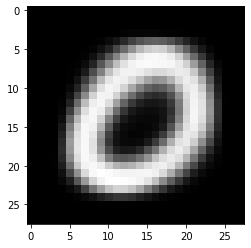

In [56]:
import matplotlib.pyplot as plt

plt.imshow(kmeans.cluster_centers_[3].reshape(28, 28), cmap='Greys_r')

In [1]:
#1

import numpy as np
a = np.diag([1, 2, 3, 4])
b = np.zeros(4)
c = np.zeros(5).reshape(5, 1)
a = np.hstack((np.vstack((b, a)), c))
a

array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 4., 0.]])

In [13]:
#2


a = np.random.random((10, 3))
print(a)

print(a[np.arange(10), np.argmin(abs(a-0.5), axis = 1)])

[[0.15800863 0.45517967 0.80703832]
 [0.32129897 0.87669261 0.90188098]
 [0.35704298 0.43911181 0.7270404 ]
 [0.12077124 0.43120013 0.70193717]
 [0.97602985 0.13115    0.22341301]
 [0.09396964 0.15199986 0.50160922]
 [0.30089092 0.95499191 0.38446743]
 [0.1882934  0.93331602 0.70631754]
 [0.94773811 0.73995939 0.96940491]
 [0.026153   0.97174869 0.13955649]]
[0.45517967 0.32129897 0.43911181 0.43120013 0.22341301 0.50160922
 0.38446743 0.70631754 0.73995939 0.13955649]


In [33]:
#3

A = np.random.random((6, 6))
print(A)
a = np.max(A, axis = 0)
b = np.sum(A, axis = 1)
print(a/b)

[[3.97093924e-01 3.68099144e-01 3.52927796e-01 7.07157897e-01
  1.49252245e-01 6.54183583e-01]
 [5.25871879e-01 2.96865057e-02 2.28503231e-01 3.81054055e-01
  3.35775711e-02 7.16719189e-01]
 [5.76018773e-01 2.29966638e-01 2.66819663e-01 1.83421296e-01
  8.46522055e-01 5.26386310e-01]
 [3.96889647e-01 6.32060719e-01 1.51091610e-01 8.99334792e-04
  5.46315693e-01 3.94667627e-01]
 [3.85542541e-01 2.27166183e-01 8.46395320e-01 4.53505897e-01
  2.73538399e-01 1.53353934e-01]
 [1.41012998e-01 9.80344799e-01 7.63354524e-02 5.58596766e-01
  3.34160639e-01 5.11289662e-01]]
0.21912564221685038
[0.21912564 0.51181917 0.32192923 0.3332625  0.36183853 0.27547684]


In [35]:
#4

x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

print(np.max(x[1:][(x==0)[:-1]]))

5


In [36]:
#5

x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])

print(x + np.bincount(i, minlength = len(x)))

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [42]:
#6
import math
print(int(6.5478))
print(round(6.5478))
print(math.ceil(6.5478))

6
7
7


In [48]:
#7
X = np.array([[1, 2], [2, 2], [0, 3]])
print(X[:,0])
def k_means(X, k, max_iter, theshold):
    N = len(X[:,0])
    M = len(X[0])
    clusters = [[] for i in range(k)]
    for item in range(k):
        clusters[item].append(X[item])
    print(clusters)
k_means(X, 5, 5, 5)
        

[1 2 0]


IndexError: index 3 is out of bounds for axis 0 with size 3